In [33]:
import pandas as pd
import seaborn as sns

In [34]:
#Loading the test and training data. We have used the dataset of Amazon Product Reviews
data = 'train.csv'
test_data = 'test.csv'
products = pd.read_csv(data,header=None,names=['Rating','Title','Review'],encoding='utf-8')
products = products[0:100000] #Choosing only first 1000000 rows for the training. We can also randomize it
products = products[["Rating","Review"]]
products.head()

,Rating,Review
0,3,Gave this to my dad for a gag gift after direc...
1,5,I hope a lot of people hear this cd. We need m...
2,5,I'm reading a lot of reviews saying that this ...
3,4,The music of Yasunori Misuda is without questi...
4,5,Probably the greatest soundtrack in history! U...


In [35]:
test_df = pd.read_csv(test_data,header=None,names=['Rating','Title','Review'],encoding='utf-8')
test_df = test_df[0:100000] #Choosing only first 1000000 rows for the training. We can also randomize it
test_df = test_df[["Rating","Review"]]
test_df.head()

,Rating,Review
0,1,"This model may be ok for sedentary types, but ..."
1,4,This is a fast read filled with unexpected hum...
2,2,I bought one of these chargers..the instructio...
3,2,I was excited to find a book ostensibly about ...
4,2,"I am a big JVC fan, but I do not like this mod..."


In [36]:
products = products.dropna()
len(products)

100000

In [37]:
test_df = test_df.dropna()
len(test_df)

100000

In [38]:
products_pos = products[products["Rating"].isin([4,5])]
products_pos.shape

(40147, 2)

In [39]:
products_neg = products[products["Rating"].isin([1,2])]
products_neg.shape

(39295, 2)

In [40]:
products.Rating.value_counts()

Rating
3    20558
5    20161
2    20107
4    19986
1    19188
Name: count, dtype: int64

<Axes: xlabel='Rating'>

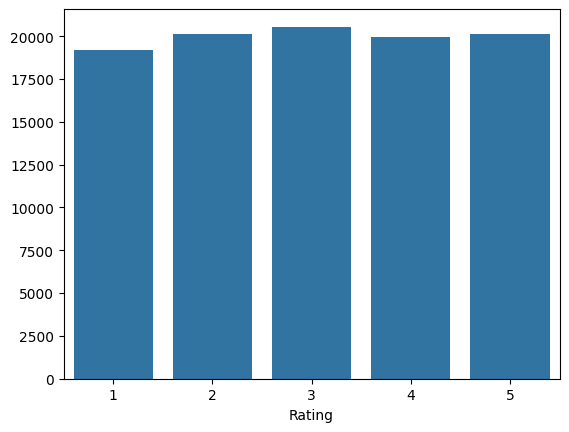

In [41]:
sns.barplot(x=products.Rating.value_counts().index,y=products.Rating.value_counts().values)

In [42]:
products["sentiment"]=1
products["sentiment"][products["Rating"].isin([1,2])]= 0
products.head()
(products['sentiment'].value_counts()[0],products['sentiment'].value_counts()[1])

C:\Users\KIIT\AppData\Local\Temp\ipykernel_30536\3330646074.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  products["sentiment"][products["Rating"].isin([1,2])]= 0
C:\Users\KIIT\AppData\Local\Temp\ipykernel_30536\3330646074.py:2: Settin

(39295, 60705)

In [43]:
test_df["sentiment"] = 1
test_df["sentiment"][test_df["Rating"].isin([1,2])] = 0
(test_df['sentiment'].value_counts()[0],test_df['sentiment'].value_counts()[1])
test_df.tail()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_30536\4014632355.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  test_df["sentiment"][test_df["Rating"].isin([1,2])] = 0
C:\Users\KIIT\AppData\Local\Temp\ipykernel_30536\4014632355.py:2: Setting

,Rating,Review,sentiment
99995,3,"""Manhattan"" is good, and a must-have for Woody...",1
99996,1,This DVD was released when DVDs first started ...,0
99997,3,Purple Rain is a classic film. It was an unexp...,1
99998,3,"I found some of the ""habits"" to be either obvi...",1
99999,2,This book concludes with thinly veiled Mormon ...,0


In [44]:
X_train = products['Review']
y_train = products["sentiment"]
X_test = test_df["Review"]
y_test = test_df["sentiment"]

In [45]:
X_train.head()

0    Gave this to my dad for a gag gift after direc...
1    I hope a lot of people hear this cd. We need m...
2    I'm reading a lot of reviews saying that this ...
3    The music of Yasunori Misuda is without questi...
4    Probably the greatest soundtrack in history! U...
Name: Review, dtype: object

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Create CountVectorizer with stopword removal
count_vector = CountVectorizer(stop_words=list(ENGLISH_STOP_WORDS))
ctmTr = count_vector.fit_transform(X_train)
X_test_dtm = count_vector.transform(X_test)

In [47]:
ctmTr.shape

(100000, 107778)

In [48]:
# 1) Multinomial
from sklearn.naive_bayes import MultinomialNB
mul_model = MultinomialNB()
mul_model.fit(ctmTr,y_train)


MultinomialNB()

In [49]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
predictions = dict()

predictions["Multinomial"] = mul_model.predict(X_test_dtm)
accuracy_score(y_test, predictions["Multinomial"])

0.75866

In [50]:
predictions["Multinomial"]

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [51]:
print(classification_report(y_test, predictions["Multinomial"]))

              precision    recall  f1-score   support

           0       0.70      0.69      0.69     39494
           1       0.80      0.80      0.80     60506

    accuracy                           0.76    100000
   macro avg       0.75      0.75      0.75    100000
weighted avg       0.76      0.76      0.76    100000



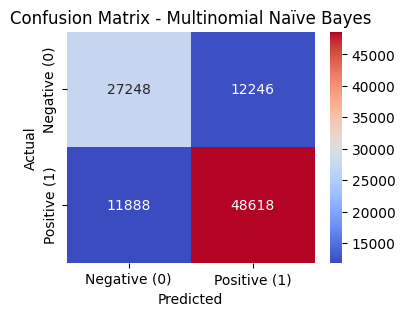

In [52]:
import matplotlib.pyplot as plt

cm_multinomial = confusion_matrix(y_test, predictions["Multinomial"])
plt.figure(figsize=(4,3))
sns.heatmap(cm_multinomial, annot=True, fmt="d", cmap="coolwarm", 
            xticklabels=["Negative (0)", "Positive (1)"], 
            yticklabels=["Negative (0)", "Positive (1)"])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Multinomial Naïve Bayes")
plt.show()

In [53]:
 #2)BernoulliNB
from sklearn.naive_bayes import BernoulliNB
ber_model = BernoulliNB()
ber_model.fit(ctmTr,y_train)

BernoulliNB()

In [54]:
predictions["BernoulliNB"]=ber_model.predict(X_test_dtm)
accuracy_score(y_test,predictions["BernoulliNB"])

0.75986

In [55]:
predictions["BernoulliNB"]

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [56]:
print(classification_report(y_test, predictions["BernoulliNB"]))

              precision    recall  f1-score   support

           0       0.72      0.63      0.68     39494
           1       0.78      0.84      0.81     60506

    accuracy                           0.76    100000
   macro avg       0.75      0.74      0.74    100000
weighted avg       0.76      0.76      0.76    100000



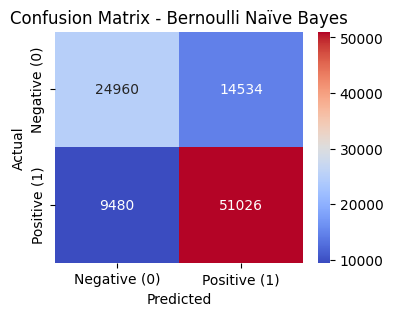

In [57]:
cm_bernoulli = confusion_matrix(y_test, predictions["BernoulliNB"])
plt.figure(figsize=(4,3))
sns.heatmap(cm_bernoulli, annot=True, fmt="d", cmap="coolwarm", 
            xticklabels=["Negative (0)", "Positive (1)"], 
            yticklabels=["Negative (0)", "Positive (1)"])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Bernoulli Naïve Bayes")
plt.show()

In [58]:
predictions

{'Multinomial': array([0, 1, 0, ..., 1, 1, 0], dtype=int64),
 'BernoulliNB': array([0, 1, 0, ..., 1, 1, 0], dtype=int64)}

In [59]:
new_reviews = ["The product is amazing!", "Not bad"]
new_vectors = count_vector.transform(new_reviews)

In [60]:
new_predictions_mul = mul_model.predict(new_vectors)
new_vectors = count_vector.transform(new_reviews)
for review, sentiment in zip(new_reviews, new_predictions_mul):
    print(f"Review: {review} -> Sentiment: {'Positive' if sentiment == 1 else 'Negative'}")

Review: The product is amazing! -> Sentiment: Positive
Review: Not bad -> Sentiment: Negative


In [61]:
new_predictions_ber = ber_model.predict(new_vectors)

for review, sentiment in zip(new_reviews, new_predictions_ber):
    print(f"Review: {review} -> Sentiment: {'Positive' if sentiment == 1 else 'Negative'}")

Review: The product is amazing! -> Sentiment: Positive
Review: Not bad -> Sentiment: Positive
